In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.10.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
test_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'

train_set = pd.read_csv(data_url, sep=", ",header = None)
test_set = pd.read_csv(test_url, sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


C:\Users\krzys\AppData\Local\Temp\ipykernel_15924\2049605904.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_set = pd.read_csv(data_url, sep=", ",header = None)
C:\Users\krzys\AppData\Local\Temp\ipykernel_15924\2049605904.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_set = pd.read_csv(test_url, sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [4]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


C:\Users\krzys\AppData\Local\Temp\ipykernel_15924\3132754484.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})
C:\Users\krzys\AppData\Local\Temp\ipykernel_15924\3132754484.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['native_country'] = dataset['native_country'].replace(d)


In [5]:
from keras.callbacks import ModelCheckpoint

In [6]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [7]:
save_best_model = ModelCheckpoint("wagi_best.h5py",save_best_only=True)
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [8]:
save_best_model = ModelCheckpoint("wagi_best.h5py",save_best_only=True)
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

# Reshape labels if necessary (for example, for categorical crossentropy)
y_train = np.expand_dims(y_train, axis=-1)
y_test = np.expand_dims(y_test, axis=-1)
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[save_best_model])

Epoch 1/100
943/943 [==============================] - 4s 4ms/step - loss: 0.4349 - accuracy: 0.7883 - val_loss: 0.3806 - val_accuracy: 0.8101
Epoch 2/100
943/943 [==============================] - 3s 3ms/step - loss: 0.3788 - accuracy: 0.8131 - val_loss: 0.3701 - val_accuracy: 0.8115
Epoch 3/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3716 - accuracy: 0.8150 - val_loss: 0.3709 - val_accuracy: 0.8226
Epoch 4/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3665 - accuracy: 0.8197 - val_loss: 0.3786 - val_accuracy: 0.8050
Epoch 5/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3710 - accuracy: 0.8130 - val_loss: 0.3730 - val_accuracy: 0.8085
Epoch 6/100
943/943 [==============================] - 3s 3ms/step - loss: 0.3697 - accuracy: 0.8129 - val_loss: 0.3640 - val_accuracy: 0.8177
Epoch 7/100
943/943 [==============================] - 3s 3ms/step - loss: 0.3650 - accuracy: 0.8208 - val_loss: 0.3591 - val_accuracy: 0.8252

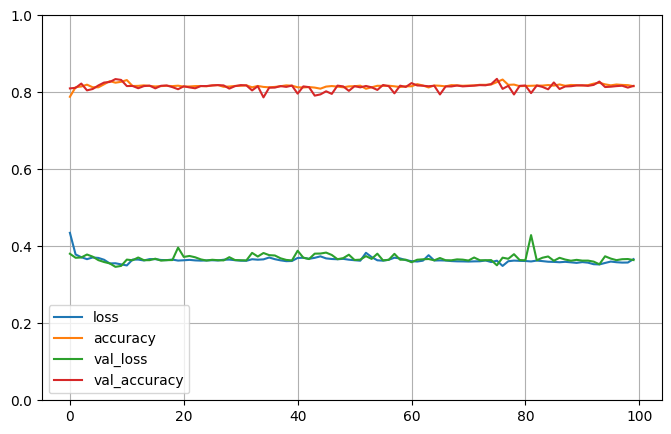

In [9]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [10]:
model.evaluate(X_test,y_test)

471/471 [==============================] - 1s 1ms/step - loss: 0.3642 - accuracy: 0.8165


[0.36416828632354736, 0.8165338635444641]

In [11]:
from sklearn.metrics import accuracy_score

# Get predictions
y_pred = model.predict(X_test)

# Assuming a binary classification problem
y_pred = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

471/471 [==============================] - 0s 873us/step
Accuracy: 0.8165338645418326


# Zad

Wczytaj nauczony model

In [12]:
model.load_weights("wagi_best.h5py")
model.evaluate(X_test,y_test)

471/471 [==============================] - 0s 935us/step - loss: 0.3465 - accuracy: 0.8343


[0.34654664993286133, 0.8342629671096802]

# Zad

* Naucz dowolny model na zbiorze MNIST.
* Zapisz optymalne parametry uczenia do pliku
* Wczytaj dane z pliku

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2758 - accuracy: 0.9218 - val_loss: 0.1423 - val_accuracy: 0.9580
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1242 - accuracy: 0.9631 - val_loss: 0.1068 - val_accuracy: 0.9686
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0857 - accuracy: 0.9734 - val_loss: 0.0946 - val_accuracy: 0.9714
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0640 - accuracy: 0.9804 - val_loss: 0.0820 - val_accuracy: 0.9744
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0485 - accuracy: 0.9850 - val_loss: 0.0727 - val_accuracy: 0.9784
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0387 - accuracy: 0.9880 - val_loss: 0.0879 - val_accuracy: 0.9752
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0302 - accuracy: 0.9906 - val_loss: 0.0819 - val_accuracy:

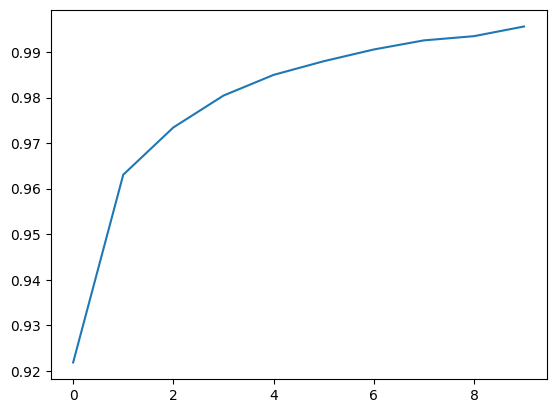

313/313 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 0.9752


[0.08119170367717743, 0.9751999974250793]

In [14]:

from keras.layers import Flatten

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

save_best_model = ModelCheckpoint("my_model.h5py",save_best_only=True)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[save_best_model])

plt.plot(history.history['accuracy'])
plt.show()


model.load_weights("my_model.h5py")
model.evaluate(X_test,y_test)
